In [1]:
import numpy as np
import pylab as pl
from os.path import join as pjoin
import mvpa2.suite as mv
import glob
from scipy.stats import zscore

/dartfs-hpc/rc/home/4/f002d44/.local/lib/python2.7/site-packages/mvpa2/testing/tools.py:81: DeprecationWarning: Importing from numpy.testing.decorators is deprecated since numpy 1.15.0, import from numpy.testing instead.
  from numpy.testing.decorators import skipif


In [2]:
subid = [1,12,17,27,32,33,34,36,37,41]
subjs = ['{:0>6}'.format(i) for i in subid]
hemis = ['lh', 'rh']

In [3]:
taxonomy = np.repeat(['bird', 'insect', 'primate', 'reptile', 'unduate'],4)
behavior = np.tile(['eating', 'fighting', 'running', 'swimming'],5)
conditions = [' '.join((beh, tax)) for beh, tax in zip(behavior, taxonomy)]

In [4]:
data_path = '/dartfs-hpc/scratch/psyc164/mvpaces/glm/'
prefix = data_path+'sub-rid'+sub
suffix = hemi+'.coefs.gii'
fn = prefix + '*' + suffix
files = sorted(glob.glob(fn))
print(len(files))

NameError: name 'sub' is not defined

In [8]:
all_lh_data = [] 
all_rh_data = []
for hemi in hemis:
    for sub in subjs:
        # get all our data files for this subj
        ds = None
        data_path = '/dartfs-hpc/scratch/psyc164/mvpaces/glm/'
        prefix = data_path+'sub-rid'+sub
        suffix = hemi+'.coefs.gii'
        fn = prefix + '*' + suffix
        files = sorted(glob.glob(fn))

        for x in range(len(files)):
            if x < 5:
                chunks = [x+1]*20
            else:
                chunks = [x-5+1]*20
                
            d = mv.gifti_dataset(files[x], chunks=chunks, targets=conditions)
            d.sa['conditions']=conditions
            if ds is None:
                ds = d
            else:      
                ds = mv.vstack((ds,d))
        
        ds.fa['node_indices']=range(ds.shape[1])
        ds.samples = zscore(ds.samples, axis=1)
        if hemi == 'rh':
            all_rh_data.append(ds)
        else:
            all_lh_data.append(ds)

/dartfs-hpc/rc/home/4/f002d44/.local/lib/python2.7/site-packages/mvpa2/datasets/gifti.py:77: DeprecationWarning: giftiio.read function deprecated. Use nibabel.load() instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  samples = giftiio.read(samples)


In [ ]:
all_rh_data[0].shape

In [9]:
def plot_mtx(mtx, labels, title):
    pl.figure()
    pl.imshow(mtx, interpolation='nearest')
    pl.xticks(range(len(mtx)), labels, rotation=-45)
    pl.yticks(range(len(mtx)), labels)
    pl.title(title)
    #pl.clim((0, 2))
    pl.colorbar()

/dartfs-hpc/rc/home/4/f002d44/.conda/envs/comp_meth_env/lib/python2.7/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


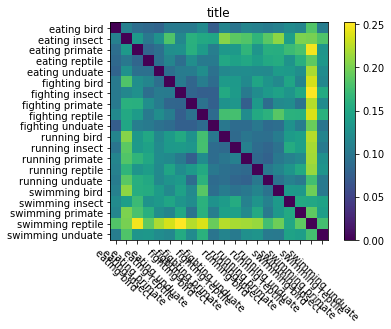

In [10]:
from mvpa2.mappers.fx import mean_group_sample
from mvpa2.measures import rsa

# for ds in all_rh_data:
ds = all_rh_data[0]
mtgs = mean_group_sample(['conditions'])
mtds = mtgs(ds)
dsm = rsa.PDist(square=True)
res = dsm(mtds)
plot_mtx(res, mtds.sa.conditions, 'title')


In [102]:
mtds.shape

(20, 40962)

In [11]:
# load surface and get searchlight query
radius = 9 
surface = mv.surf.read(pjoin(data_path, '{0}.pial.gii'.format(hemi)))
# this is an arbitrary radius and distance metric!
query = mv.SurfaceQueryEngine(surface, radius, distance_metric='dijkstra')

/dartfs-hpc/rc/home/4/f002d44/.local/lib/python2.7/site-packages/mvpa2/support/nibabel/surf_gifti.py:51: DeprecationWarning: giftiio.read function deprecated. Use nibabel.load() instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  g = giftiio.read(fn)
/dartfs-hpc/rc/home/4/f002d44/.local/lib/python2.7/site-packages/mvpa2/support/nibabel/surf_gifti.py:25: DeprecationWarning: getArraysFromIntent method deprecated. Use get_arrays_from_intent instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  ar = g.getArraysFromIntent(intent)


In [138]:
dsm = rsa.PDist(square=False)
sl = mv.Searchlight(dsm, query)
slres = sl(mtds)


In [12]:
dsm2 = rsa.PDist(center_data=True)
sl2 = mv.Searchlight(dsm2, query)
slres2 = sl2(mtds)
slres.samples = np.nan_to_num(slres2.samples)
sq = squareform(slres2.samples[:,1])

NameError: name 'slres' is not defined

In [21]:
from scipy.spatial.distance import squareform


slres2.samples = np.nan_to_num(slres2.samples)
sq = squareform(slres2.samples[:,2])

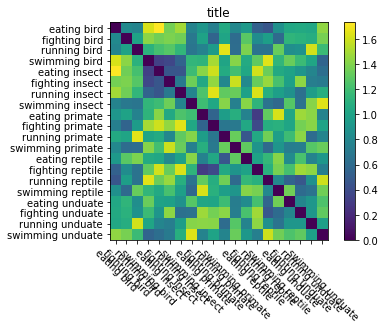

In [22]:
import matplotlib
import matplotlib.pyplot as plt
plot_mtx(sq, conditions, 'title')

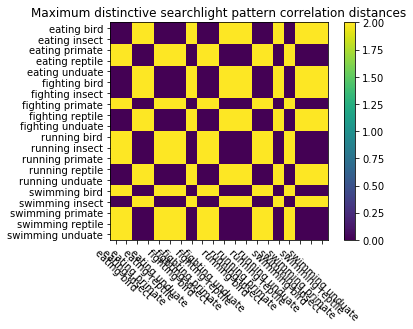

In [101]:
distinctiveness = np.sum(np.abs(slres), axis=0)
from scipy.spatial.distance import squareform
plot_mtx(squareform(slres.samples[:, distinctiveness.argmax()]),
         mtds.sa.conditions,
         'Maximum distinctive searchlight pattern correlation distances')

In [23]:
12*11 / 2

66

In [25]:
l = np.array([[3,2,3], [1,2,3]])
a = np.subtract(np.ones(l.shape), l)

In [26]:
np.mean(a)

-1.3333333333333333